<h1><center> Introduction to Natural Language Processing </center></h1>


Let's get started by setting up the workspace 

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
## Change the working directory for the notebook
%cd /content/gdrive/My Drive/dscamp/dscamp_public/NLP 1/data/

/content/gdrive/My Drive/dscamp/dscamp_public/NLP 1/data


In [4]:
## Unzip the data 
!cat glove.6B.100d.tar.xz.parta* > glove.6B.100d.tar.xz
!tar -xvf glove.6B.100d.tar.xz

glove.6B.100d.txt


In [0]:
import logging, warnings
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.filterwarnings('ignore')

import nltk
my_dir = '/content/gdrive/My Drive/dscamp/dscamp_public/NLP 1'
nltk.data.path.append(my_dir+"/data/nltk_data/")
import sys
sys.path.append(my_dir)

<font color='red'> <h2> What is NLP? </h2> </font> 
* One of the most challenging and revolutionary things artificial intelligence (AI) can do is speak, write, listen, and understand human language. Natural language processing (NLP) is a form of AI that extracts meaning from human language to make decisions based on the information.  
<br>
* It is an interdisciplinary field which draws on other areas of study such as computer science, Artificial Intelligence, linguistics.

![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/image001.png)

<font color='red'> <h2> Why NLP Understanding is hard? </h2> </font> 
* Natural language is extremely rich in form and structure, and very ambiguous.
    - How to represent meaning
    - Which structures map to which meaning structures.  
<br>
* One input can mean many different things. Ambiguity can be at different levels.
    - Lexical (word level) ambiguity  -- different meanings of words
    - Syntactic ambiguity  --  different ways to parse the sentence
    - Interpreting partial information  --  how to interpret pronouns
    - Contextual information  --  context of the sentence may affect the meaning of that sentence.  
<br>
* Many inputs can mean the same thing.  
<br>
* Interaction among components of the input is not clear. 

* How to represent language in a form that computers understand: "hello world" -> '1101000 1100101 1101100 1101100 1101111 100000 1110111 1101111 1110010 1101100 1100100'

![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/image002.png)

**What Applications of NLP can you think of?**

<font color='red'> <h2> NLP Applications </h2> </font> 
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/machine_translation.png)
* Famous application: **Google Translate**
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/Picture1.png)
* Movie Reviews: **Positive of Negative**

![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/Picture2.png)
* Classification of emails: **Important, Spam, etc**

![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/Picture3.png)
<font> <h3> Speech recognition (Speech-to-text) and Speech Understanding </h3> </font> 
<figure>
<center>
<img src='https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/speech_recog.jpeg' width=300/>
</figure>

* Famous application: **Amazon’s Alexa, Google’s Home, SIRI**

<font> <h3> Text prediction </h3> </font> 
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/text_pred.png)

* Speed up word processing and facilitate text dictation (seen in SMS and email)


<font color='red'> <h2> NLP Overview </h2> </font> 
* NLP terminology
* Text pre-processing
* Word representation 
* Text representations
* Sentiment analysis on the Amazon reviews using SVM
* Sentiment analysis on the Amazon reviews using CNN


<font color='red'> <h2> NLP terminology (sample dataset) </h2> </font>

Let’s take an example to understand some terminology concepts in depth.

1. “It was the best of times”
2.   “It was the worst of times”
3.   “It was the age of wisdom”
4.   “It was the age of foolishness”

Each sentence is a separate document and we make a list of all words from all the four documents excluding the punctuation.


<font color='red'> <h2> NLP terminology</h2> </font>

**Corpus**

In linguistics and NLP, corpus (plural corpora) refers to a collection of texts. Corpora are generally solely used for statistical linguistic analysis and hypothesis testing.

**Tokenization** 
Tokenization is, generally, an early step in the NLP process, a step which splits longer strings of text into smaller pieces, or **tokens**. Tokens can be words, punctuations, numeric text etc. 
Here we consider words as tokens and remove whitespace to extract the tokens.

1. “It” “was” “the” “best” “of” “times”
2. “It” “was” “the” “worst” “of” “times”
3. “It” “was” “the” “age” “of” “wisdom”
4. “It” “was” “the” “age” “of” “foolishness”

**Vocabulary** 

Set of all unique words (tokens) in a dataset.

The set of unique words are :
‘It’, ‘was’, ‘the’, ‘best’, ‘of’, ‘times’, ‘worst’, ‘age’, ‘wisdom’, ‘foolishness’


<font color='red'> <h2> NLP terminology </h2> </font>

**Stop Words:**

Stop words are those words which are filtered out before further processing of text, since these words contribute little to the overall meaning, given that they are generally the most common words in a language. 
“a” , “the”, “have”, “has”, etc.    

**N-gram:** 

For a fixed, small N (2-5 is common), an N-gram is a consecutive sequence of words in a text.
For example, the bigrams in the first document : “It was the best of times” are as follows:
“it was”     “was the”        “the best”       “best of”      “of times”

**Syntax:**

The allowable structures in the language: sentences, phrases, affixes (-ing, -ed, -ment, etc.).

**Semantics:** 

The meaning(s) of texts in the language. 

<font color='red'> <h2> NLP Pipeline </h2> </font> 
<font color='black'> <h3> During this class we will go through the NLP pipeline where you can write your own text and follow the steps. We will perform sentiment analysis on amazon reviews dataset. You can write your own review and see if the model thinks it's positive or negative! </h3> </font> 
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/Capture.PNG)

<font color='red'> <h2> Text Pre-processing -  extracting the useful information from the textual data </h2> </font> 

* Converting all letters to lower or upper case

* Converting numbers into words or removing numbers

* Removing punctuations, accent marks and other diacritics

* Removing white spaces

* Removing stop words, sparse terms, and particular words

* Stemming

* Lemmatization



In [0]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
def convert_to_lower(mytext):
    return mytext.lower()
def remove_numbers(mytext):
    return ''.join([i for i in mytext if not i.isdigit()])
def remove_punctuation(mytext):
    table = str.maketrans('', '', string.punctuation)
    return ' '.join([w.translate(table) for w in mytext.split()])
def remove_white_spaces(mytext):
    return ' '.join(mytext.strip().split())
def remove_stop_words(mytext):
    stop_words = list(stopwords.words('english')) 
    output =[]
    return ' '.join([i for i in mytext.split() if not i in stop_words])
def stemming(mytext):
    stemmer= PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in mytext.split()])
def lemmatization(mytext):
    lemmatizer=WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in mytext.split()])


def pre_process(mytext):
    mytext_lower = convert_to_lower(mytext)
    my_text_char = remove_numbers(mytext_lower)
    my_text_no_punct = remove_punctuation(my_text_char)
    my_text_white_spaces = remove_white_spaces(my_text_no_punct)
    preprocessed_text = remove_stop_words(my_text_white_spaces)
    return preprocessed_text

<font color='red'> <h2> Write your text below and test our pre-processing functions! </h2> </font> 

###  Convert text to lowercase

In [7]:
mytext = "The 5 biggest countries by population in 2017 are China, India, United States, Indonesia, and Brazil."
print(convert_to_lower(mytext))

the 5 biggest countries by population in 2017 are china, india, united states, indonesia, and brazil.


###  Remove numbers

In [8]:
mytext = "Box A contains 3 red and 5 white balls, while Box B contains 4 red and 2 blue balls."
print(remove_numbers(mytext))

Box A contains  red and  white balls, while Box B contains  red and  blue balls.


###  Remove punctuation
The following code removes this set of symbols "[ ! ” # $ % & ’ () * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ]:"

In [9]:
mytext = "This &is [an] example? {of} string. with.? punctuation!!!!"
print(remove_punctuation(mytext))

This is an example of string with punctuation


###  Remove whitespaces
The following removes leading and ending spaces.

In [10]:
mytext = " \t a string example\t "
print(remove_white_spaces(mytext))

a string example


#### Remove Stopwords




In [11]:
mytext = 'NLTK is a leading platform for building Python programs to work with human language data.'
print(remove_stop_words(mytext))

NLTK leading platform building Python programs work human language data.


###  Stemming

Stemming is a process of reducing words to their word stem, base or root form. 
Some examples of stemming for root word "like" include:

->"likes"

->"liked"

->"likely"

->"liking"

In [12]:
mytext = 'There are several types of stemming algorithms.'
print(stemming(mytext))

there are sever type of stem algorithms.


###  Lemmatization

The aim of lemmatization, like stemming, is to reduce inflectional forms to a common base form. As opposed to stemming, lemmatization does not simply chop off inflections. Instead it uses lexical knowledge bases to get the correct base forms of words.

Lemmatization tools are presented libraries described above: NLTK (WordNet Lemmatizer), spaCy, TextBlob, Pattern, gensim, Stanford CoreNLP, Memory-Based Shallow Parser (MBSP), Apache OpenNLP, Apache Lucene, General Architecture for Text Engineering (GATE), Illinois Lemmatizer, and DKPro Core.

In [13]:
mytext = 'There are several types of stemming algorithms.'
print(lemmatization(mytext))

There are several type of stemming algorithms.


![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/Capture2.PNG)

<font color='red'> <h2>How do we have usable meaning in a computer?</h2> </font> 

Definition: meaning (Webster dictionary)
<br/>
• the idea that is represented by a word, phrase, etc.
<br/>
• the idea that a person wants to express by using
words, signs, etc.
<br/>
• the idea that is expressed in a work of writing, art, etc.
<br/>
How do we represent words? Remember, the computer only understands numbers ... 

### Solution 1: Representing words as discrete symbol
Example: Very entertaining and funny!
<br/>
* We define the vocabulary: 
\begin{align}
\mathcal V =\{'entertaining','funny'\}\\
\end{align}
* Embeddings: 
\begin{equation}
  emb =
    \begin{cases}
      X^{entertaining} = [1,0]\\
      X^{funny} = [0,1]\\
    \end{cases}       
\end{equation}
* Vector dimension = number of words in vocabulary (e.g., 500,000)
* This Method is called **<font color='red'>One Hot Encoding**</font> : <br/>
For a corpus 𝐶 with finite vocabulary, 𝑉 and |𝑉|=𝑛.
<br/> Let emb:𝑉→ℕ×ℕ⋯×ℕ≐𝑉 ̃  be a map defined by taking every element in 𝑉 to an 𝑛 component object 𝑋 ⃗∈𝑉 ̃
 such that: <br/>
    \begin{equation}
  X_{i}^{w} =
    \begin{cases}
      1, & \text{if    } idx(w)=i \\
      0,& \text{otherwise}\\
    \end{cases}       
\end{equation}
<br/>



In [0]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def discrete_word_representation(mytext):
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(mytext.split())
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    return onehot_encoder.fit_transform(integer_encoded)

In [15]:
# We pre-process our product review! 
positive_review= "Very entertaining and funny!"
processed_positive_review = pre_process(positive_review)
print(processed_positive_review)

entertaining funny


In [16]:
one_hot_vec = discrete_word_representation(processed_positive_review)
one_hot_vec

array([[1., 0.],
       [0., 1.]])

Using TensorFlow backend.


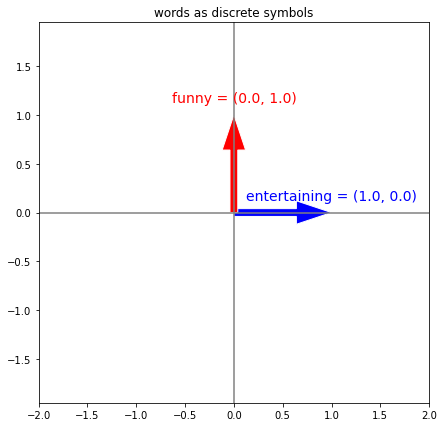

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from utilities import *
figure()
new_blank_plot(title='words as discrete symbols')
draw_vector2d(one_hot_vec[0], color='blue')
draw_vector2d(one_hot_vec[1], color='red')
draw_label2d(one_hot_vec[0], processed_positive_review.split()[0], color='blue', coords=True)
draw_label2d(one_hot_vec[1], processed_positive_review.split()[1], color='red', coords=True)

** These 2 vectors are <font color='red'>orthogonal</font>** <br/>
** There is no natural notion of <font color='red'> similarity</font> for one-hot vectors!**
<h2>  Learn to encode similarity in the vectors themselves !</h2>

### Solution 2: Representing words by their context
* **Distributional semantics: A word’s meaning is given by the words that frequently appear close-by**
* When a word w appears in a text, its context is the set of words that appear nearby (within a fixed-size window).
* Use the many contexts of $w$ to build up a representation of $w$
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/Context_representation.PNG)


<font color='red'> <h2> Word Vectors/Embeddings</h2> </font> 
* We will build a dense vector for each word, chosen so that it is similar to vectors of words that appear in similar contexts.
<br/>
* **Lower dimensional** -> We consider a word embedding to a D dimensional vector space where D is less than the size of the vocabulary. (in practice it is a linear projection from the embedding space created by one hot encoding and D is no more than 500).
<br/>
* **“Semantic and Syntax”** -> Word vectors will be allowed to be non-orthogonal. In non-mathematical terms we will preserve the semantic similarity of words by using the direction of the word vectors.

![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/linear-relationships.svg)


<font color='red'> <h2> Word2Vec Efficient high dimensional word embeddings </h2> </font>

Two related models: 
* Skip-Gram model: predict context from the context words (position independent) within a fixed window given center word
* Continuous Bag of Words model (CBOW): predict center word from (bag of) context words

Example: "... rescue by the Treasury and Fed..." with a window size of 2
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/word2vec_models.png)

<font color='red'> <h2> Word2Vec </h2> </font>
We expand on Skip-Gram model. The idea:

• We have a large corpus of text 

• Every word in a fixed vocabulary is represented by a vector

• Go through each position t in the text, which has a center word $w_t$ and context of words within a fixed window size

• Use the similarity of the word vectors for the center word $w_t$ and context word to calculate the probability of context given center (or vice versa)

• Keep adjusting the word vectors to maximize this probability

Example	windows	and	process	for	computing $P(w_{t+j}|w_t)$
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/example_context.png)

<font color='red'> <h2> How do we get these vectors? </h2> </font> 

* We append all the documents, then iterate through every word t in the corpus, predict the context words within the fixed window size m, given the center word:
The likelihood $L(\theta)=\prod_{t=1}^{T} \prod_{-m\le j \le m}^{T}P(w_{t+j}|w_t;\theta)$

* The parameters $\theta$ are all the vector embeddings. $\theta$ is one long vectyor of size $d*V$ where $d$ is the size of the embedding vectors and $V$ is the vocabulary 

* We obtain the embeddings by minimizing the objective function defined as the average negative log likelihood: $J(\theta)=-\frac{1}{T} \sum_{t=1}^{T} \sum_{-m\le j \le m}^{T}logP(w_{t+j}|w_t;\theta)$

* By minimizing the objective function, we maximize the predictive accuracy


<font color='red'> <h2> How do we get these vectors? -- Gradient Descent </h2> </font>

We use gradient descent to minimize the cost function $J(\theta)$.
* Start with random value of $\theta$
* Calculate gradient of $J(\theta)$
* Take a step in the direction of negative gradient
* Repeat
$$ \theta_{new} = \theta_{old} - \alpha \nabla(J\theta)$$
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/grad_descent.png)

In [18]:
# Read pre-trained 300-d word2vec embeddings of the reviews corpus 
import pandas as pd

embeddings_vocab = pd.read_csv(my_dir+'/data/embeddings_vocab.csv', index_col=0)
print('embeddings_vocab size: {}'.format(embeddings_vocab.shape))
embeddings_vocab.head()

embeddings_vocab size: (27989, 301)


,token,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,v_29,v_30,v_31,v_32,v_33,v_34,v_35,v_36,v_37,v_38,...,v_260,v_261,v_262,v_263,v_264,v_265,v_266,v_267,v_268,v_269,v_270,v_271,v_272,v_273,v_274,v_275,v_276,v_277,v_278,v_279,v_280,v_281,v_282,v_283,v_284,v_285,v_286,v_287,v_288,v_289,v_290,v_291,v_292,v_293,v_294,v_295,v_296,v_297,v_298,v_299
0,said,-0.009094,-0.044189,0.099609,-0.076172,-0.056641,0.061523,0.255859,-0.158203,0.016602,-0.096680,-0.063477,-0.151367,0.074707,0.138672,-0.230469,0.062256,0.176758,0.216797,-0.250000,-0.041992,-0.201172,0.048340,0.119629,0.027832,0.112305,-0.134766,-0.109375,-0.059082,-0.207031,0.082520,-0.123047,0.046387,0.056396,0.032959,0.074219,-0.031738,0.042969,0.051514,-0.155273,...,-0.079590,-0.099121,0.029663,0.043213,0.100586,0.304688,0.269531,-0.090820,-0.088867,0.194336,0.235352,-0.208008,0.032227,0.018799,-0.138672,-0.026001,0.015747,-0.028687,0.078613,-0.115234,-0.181641,0.165039,-0.115723,-0.117188,0.170898,0.125977,-0.012512,-0.032959,0.052246,0.027222,-0.193359,0.029907,-0.093262,0.053711,-0.117676,0.069824,0.105957,0.144531,0.180664,-0.086914
1,year,0.061768,0.257812,0.003677,0.145508,-0.037354,-0.120117,0.188477,-0.154297,0.213867,0.172852,0.054199,0.021851,0.005341,-0.102539,-0.005157,-0.003357,-0.046143,-0.083496,-0.167969,-0.027344,-0.009399,-0.004486,-0.122070,-0.219727,0.026489,-0.004395,0.097168,0.084473,0.081543,0.114746,0.060547,-0.151367,0.076172,-0.006531,0.101074,0.088867,-0.217773,-0.217773,-0.100586,...,0.145508,0.050537,-0.050049,-0.015747,0.202148,0.113281,-0.043213,0.141602,-0.011047,0.109375,0.228516,-0.129883,0.208008,0.016846,-0.002502,0.015442,-0.094238,-0.064453,-0.075684,-0.199219,-0.069824,0.018188,-0.151367,0.090820,0.156250,-0.157227,-0.111816,0.068359,0.141602,0.083496,-0.031738,0.056396,-0.156250,-0.146484,0.007874,-0.133789,-0.046631,0.111816,0.072754,-0.174805
2,one,0.045654,-0.145508,0.156250,0.166016,0.109863,0.007507,0.073730,-0.031006,0.157227,0.099609,0.052002,-0.148438,0.064453,0.118164,-0.026489,0.090332,0.009644,-0.123535,-0.028564,0.007233,-0.064453,0.081055,-0.087402,-0.040771,0.018799,0.082520,-0.079590,0.079102,0.011047,0.083496,0.001846,0.076172,0.048340,0.010010,0.009094,0.007751,0.024536,-0.030396,0.045898,...,-0.035156,-0.018677,-0.091797,-0.035889,0.077148,0.095215,0.065918,0.106934,-0.188477,0.050049,0.066406,-0.005951,-0.033203,0.008850,0.131836,-0.085938,-0.197266,-0.126953,-0.017700,-0.125000,-0.043701,0.021118,0.031494,0.095215,-0.017944,-0.083496,-0.136719,-0.075195,-0.014282,0.073730,-0.028931,-0.013000,-0.060303,-0.032715,-0.103516,0.044678,-0.095215,-0.015869,0.006714,-0.001884
3,would,0.089355,0.129883,0.212891,0.177734,-0.113281,-0.094727,0.091797,-0.029663,0.027710,0.093262,-0.068848,-0.101074,-0.031250,-0.056641,0.017090,0.110840,0.082520,0.115234,0.052979,0.016357,-0.072266,-0.009216,0.127930,-0.095703,0.021240,-0.096680,-0.228516,0.024414,-0.122070,0.139648,0.022461,0.022461,-0.054932,0.028564,0.029297,0.070801,0.164062,0.049072,-0.064941,...,0.002701,0.014099,-0.108398,0.241211,0.027954,0.196289,-0.049316,0.054199,-0.054199,0.102051,0.322266,-0.063477,0.146484,0.125000,0.163086,-0.026855,0.045166,0.030884,0.073730,0.052002,-0.095215,0.076172,-0.128906,0.032959,0.032227,-0.138672,0.072754,-0.066406,0.151367,-0.008362,-0.267578,0.087891,-0.071289,0.130859,0.061768,0.187500,0.039307,-0.152344,0.005524,-0.100586
4,also,0.053467,0.012024,-0.006500,0.008545,0.016479,0.183594,-0.070801,-0.059326,0.014221,0.063965,-0.061279,-0.077148,-0.005371,0.019897,-0.175781,-0.118164,-0.065430,-0.062500,-0.208008,-0.010437,0.089844,0.016968,-0.140625,0.063477,0.045654,-0.109375,-0.118652,0.071777,-0.062500,0.035400,-0.090820,0.059082,0.035645,-0.000362,0.257812,-0.171875,0.151367,-0.096680,0.009949,...,0.106445,0.110840,-0.097656,0.067383,0.094727,0.071289,0.033447,0.111816,0.051025,0.075684,0.089355,-0.117676,0.041260,0.095215,0.094238,-0.092773,0.03

<font color='red'> <h2> Projection on 2-D for visualization </h2> </font> 
<font color='red'> <h2> We use t-SNE to project the word embeddings from 300 d to 2D </h2> </font> 

In [0]:
colors=['blue','red','green','yellow','brown','orange']
def visualize_words_w2v(my_list_of_words):
    figure()
    for i in range(len(my_list_of_words)):
        if my_list_of_words[i] in tsne_embeddings['token'].values:
            new_blank_plot(title='words embeddings Word2Vec',xlim=(-3, 3), ylim=(-3, 3))
            draw_vector2d(list(tsne_embeddings[tsne_embeddings['token']==my_list_of_words[i]].values[0][1:]), color=colors[i])
            draw_label2d(list(tsne_embeddings[tsne_embeddings['token']==my_list_of_words[i]].values[0][1:]), my_list_of_words[i], color=colors[i], coords=False)

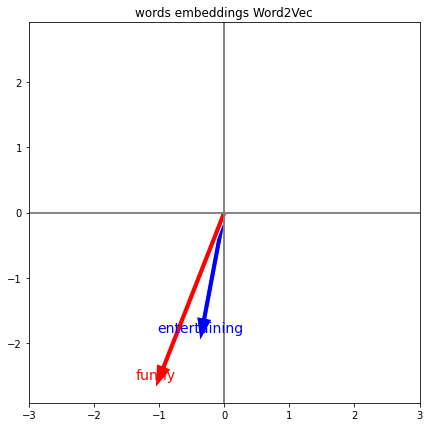

In [20]:
# Load the 2D embeddings 
tsne_embeddings = pd.read_csv(my_dir+'/data/tsne_embeddings.csv', index_col=0)
# visualize a list of words 
visualize_words_w2v(processed_positive_review.split())

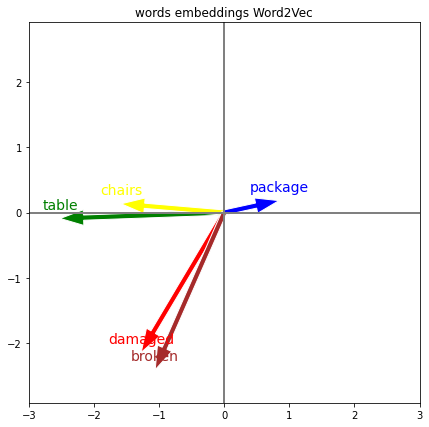

In [21]:
# visualize a list of words 
my_neg_review = 'the package is damaged and table and chairs are broken'
visualize_words_w2v(pre_process(my_neg_review).split())

<font color='red'> <h2> GloVe: Global Vectors </h2> </font> 

Another word embedding method. 

Uses global word-word co-occurrence matrix and trains a log-bilinear model with a weighted least-squares objective.

<font color='red'> **We will use pretrained GloVe embeddings of dimension 100 to see some exciting results** </font>


In [0]:
import numpy as np
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec



In [0]:
glove_file = datapath(my_dir+'/data/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [24]:
model.most_similar('summer')

[('winter', 0.8896949291229248),
 ('spring', 0.8580389022827148),
 ('autumn', 0.7742397785186768),
 ('weekend', 0.7385302782058716),
 ('year', 0.7348464131355286),
 ('days', 0.725011944770813),
 ('beginning', 0.7218300104141235),
 ('during', 0.7205086946487427),
 ('season', 0.7031365633010864),
 ('day', 0.7015056610107422)]

In [25]:
model.most_similar('movie')

[('film', 0.9055122137069702),
 ('movies', 0.895932674407959),
 ('films', 0.8663552403450012),
 ('hollywood', 0.8239825963973999),
 ('comedy', 0.8141383528709412),
 ('drama', 0.7655293941497803),
 ('sequel', 0.7644567489624023),
 ('starring', 0.7473923563957214),
 ('remake', 0.7330191135406494),
 ('shows', 0.7167207598686218)]

![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/word_analogies.png)

In [0]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [27]:
analogy('man', 'king', 'woman')

'queen'

In [28]:
analogy('england', 'english', 'italy')

'italian'

In [29]:
analogy('america', 'baseball', 'france')

'football'

<font color='red'> <h2> NLP Pipeline </h2> </font> 
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/nlp_pipeline_3.png)

<font color='red'> <h2> Transformation from words to sentences/text</h2> </font> 
* Take average of the word2vecs of its words (used in the first example SVM)
* Concatenate the word embeddings to form the sentence (used in the second example CNN)
* Another approach: Paragraph vector (2014, Quoc Le, Mikolov)
  * Extend word2vec to text level
  * Also two models: add paragraph vector as the input
![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/sentence_embed.png)

In [30]:
# Read the amazon reviews dataset
data = pd.read_csv(my_dir+'/data/amazon_data_10k.csv', index_col=0)
# pre_process the reviews dataset
data['reviews'] = data['reviews'].apply(lambda x: pre_process(x))
data.head()


,reviews,sentiment
0,nothing good say scanner image quality poor sl...,0
1,recieved skin birthday go sansa e excellent fi...,1
2,resolved issues lock pathetically poor gratefu...,0
3,work yes well nearly hoped tiny reviews stated...,0
4,leaving vacation couple days could find batter...,1


In [31]:
### Represent reviews as average of words embeddings

all_review = []
all_unigram = []

for a in data['reviews']:
    unigram = []
    review = []
    unigram = a.split()
    review = [a] * len(unigram)
    all_review.extend(review)
    all_unigram.extend(unigram)


df_unigram = pd.DataFrame({'reviews': all_review, 'token': all_unigram})
df_unigram = pd.merge(data, df_unigram, how='right', on=['reviews'])
df_unigram = df_unigram.drop_duplicates(subset = ['reviews','token'])
df_unigram = pd.merge(embeddings_vocab, df_unigram, how='right', on=['token']).dropna()
df_unigram = df_unigram.groupby(['reviews'],as_index = False).mean()
df_unigram.head()

,reviews,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,v_29,v_30,v_31,v_32,v_33,v_34,v_35,v_36,v_37,v_38,...,v_261,v_262,v_263,v_264,v_265,v_266,v_267,v_268,v_269,v_270,v_271,v_272,v_273,v_274,v_275,v_276,v_277,v_278,v_279,v_280,v_281,v_282,v_283,v_284,v_285,v_286,v_287,v_288,v_289,v_290,v_291,v_292,v_293,v_294,v_295,v_296,v_297,v_298,v_299,sentiment
0,able adjust see returning,-0.025772,0.157257,-0.144531,0.138062,-0.192871,-0.048706,0.055237,-0.057617,0.078056,-0.021973,0.001640,-0.061859,-0.066727,0.078735,-0.160583,-0.014893,0.058456,0.147461,0.032959,-0.084351,-0.072998,0.107443,-0.031616,0.063057,0.000679,0.029053,0.020007,-0.022171,0.041748,0.060303,-0.021484,0.016479,-0.066864,-0.134277,-0.003593,-0.075439,0.020233,-0.040497,0.023746,...,0.005047,-0.013824,0.170776,0.208740,-0.020828,0.234253,-0.004272,-0.007057,0.005783,0.113037,0.143982,0.100677,-0.014404,0.114716,-0.120850,-0.104919,-0.082153,-0.042061,0.054871,0.029449,-0.023010,0.018677,0.008209,0.073700,0.038025,-0.138733,0.030172,0.053774,0.047760,-0.156494,0.126587,-0.040558,-0.037659,-0.080322,0.028625,0.095215,0.017071,0.132107,-0.121521,0
1,able burn six cds failure rate,0.123006,0.027913,0.044373,0.208903,-0.009644,-0.065979,0.003011,-0.048177,0.126119,0.015432,-0.066081,-0.139750,-0.094205,0.056997,-0.059031,0.061574,0.061239,-0.026937,-0.086452,-0.018209,-0.004801,-0.045060,-0.025920,-0.039775,-0.107422,0.009623,-0.103068,0.102010,-0.040324,-0.043752,0.040873,-0.057617,-0.098165,-0.211731,-0.135935,0.008138,0.024068,-0.094554,0.008425,...,-0.029025,-0.023844,0.044271,0.065633,0.043610,-0.017995,-0.042221,-0.052327,-0.000448,0.134583,0.009326,0.047445,0.099711,0.084025,0.051473,-0.087443,-0.038513,-0.061462,-0.049764,-0.008280,0.102346,0.145345,-0.025472,-0.031169,-0.082530,0.111684,0.069431,-0.045695,0.065918,-0.078532,0.062398,-0.106160,0.027425,-0.084310,0.036051,-0.075643,-0.018814,-0.064189,-0.029114,0
2,able burn whole thing toast pioneer dvrd verif...,0.066411,0.015935,0.033649,0.139526,-0.066444,-0.003199,0.100611,-0.106558,0.051306,0.028827,-0.061002,-0.109009,-0.021353,-0.013306,-0.130230,0.139982,0.100938,0.009625,-0.000826,-0.144559,0.018273,0.071767,0.048969,0.008723,0.075505,-0.014724,-0.086430,0.027154,-0.011512,0.019095,-0.038884,-0.048312,0.019912,-0.040340,0.025348,0.016062,0.113151,-0.027010,0.048942,...,-0.040467,-0.073322,0.009641,0.078641,0.057904,-0.030264,-0.072902,-0.141301,0.039736,-0.009080,0.083932,0.162710,0.011691,-0.002783,-0.053993,-0.037344,-0.086163,-0.091177,-0.014893,-0.025531,-0.036314,0.084327,0.030776,0.036348,-0.017644,-0.084177,-0.014933,-0.018686,0.086043,-0.067284,0.051652,-0.137921,0.049885,-0.026442,0.019259,-0.046023,-0.059559,0.020724,-0.000488,0
3,able collapse small certainly moderately easy ...,0.053085,0.028626,-0.025433,0.097164,-0.119775,0.006975,0.025415,-0.034370,0.111130,0.034752,-0.041139,-0.123042,-0.011977,0.005403,-0.075433,0.033889,0.021876,0.143504,0.015154,-0.064423,-0.024271,0.097083,-0.023161,-0.004355,0.007067,-0.025381,-0.103734,0.032763,-0.019369,-0.052677,-0.056547,0.021899,-0.034056,-0.019724,-0.008855,-0.054779,0.000733,0.021399,0.028781,...,-0.005711,-0.048463,0.035529,-0.020982,0.116333,-0.057852,-0.116326,-0.074594,-0.008088,-0.005552,0.101558,0.129827,0.058205,0.013811,-0.079573,-0.017250,-0.086733,-0.056036,0.053888,0.011473,-0.039862,0.085764,0.015499,-0.015022,0.012105,-0.032823,-0.030813,0.016089,0.038072,-0.050916,0.098162,-0.056672,0.011393,-0.019860,0.048861,0.043048,-0.044175,0.025990,0.033907,1
4,able connect mac pc wireless keyboard mouse vi...,0.024727,0.009866,-0.045933,0.111139,-0.089738,0.034531,0.025286,-0.031473,0.104483,0.054201,-0.076005,-0.102926,-0.026921,-0.021929,-0.087507,0.056837,0.079685,0.097397,0.028561,-0.114248,-0.013932,0.034525,0.024446,0.020864,0.009236,-0.012570,-0.061332,0.106256,0.029606,-0.035276,-0.007376,-0.022562,-0.028767,-0.037045,0.019403,-0.072580,0.019

<font color='red'> <h2> Simple Classifier – From word representation to modeling </h2> </font> 
**Linear SVM and Logistic Based Classification**
* Pre-processing converts words to features and creates new features based on word count
* Text vectorization  outputs  the features to numerical vectors. Ex count vectors, TF-IDF vectors
* For classification problems, vector spaced based ML methods can be applied to find decision boundary between two classes .  Notable example SVM.
* Linear SVM defines the criterion that maximally separates the two classes, allowing users to adjust cost and penalty parameters on misclassification to suit business problems.

<figure>
<center>
<img src='https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/SVM_hyperplane.png' width=300/>
</figure>


In [32]:
### Split the dataset to train and test (80% for training and 20% for testing)

## Fit the linear SVC on the training data

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

Train_X, Test_X, Train_Y, Test_Y = train_test_split(df_unigram[df_unigram.columns[1:301]],df_unigram['sentiment'],test_size=0.2)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(Train_X, Train_Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [33]:
# Test the Linar SVC model on the test data
# WE use the accuracy defined as ratio of correctly predicted data by the overall data
from sklearn.metrics import accuracy_score

Test_predictions = clf.predict(Test_X)
print("The model predicted {0:.2f}% correctly from the test dataset ".format(accuracy_score(Test_Y,Test_predictions)*100))


The model predicted 83.39% correctly from the test dataset 


<font color='red'> <h2> Cassify the sentiment of your own review using the linear SVC model! </h2> </font> 
The linear SVM is able to correctly classify **83.29%** of the amazon test dataset reviews.
<br/>
You can use the function below to find out what the model thinks of your review!!

1) Write your review

2) Preprocess your review

3) Call the function get_svc_class(my_processed_review) to ge the result of the SVM model! 

In [0]:
# Classify the sentiment of my comment
import numpy as np
def get_svc_class(my_processed_review):
    avg_embed = []
    for i in my_processed_review.split():
        if i in embeddings_vocab['token'].values:
            avg_embed.append(embeddings_vocab[embeddings_vocab['token']=='happy'].values[0][1:])
    my_prediction = clf.predict(np.mean(avg_embed,axis=0).reshape(1, -1))
    if my_prediction == 1:
        print('The model predicted that the review is positive')
    else:
        print('The model predicted that the review is negative')

In [35]:
get_svc_class(processed_positive_review)

The model predicted that the review is positive


<font color='red'> <h2> Neural network classifier - convolution neural networks </h2> </font> 
* Traditionally, convolution neural networks (CNNs) are used to analyze images and are made up of one or more convolutional layers.

* Main idea here is to use multiple filters of different sizes that can look at bi-grams, tri-grams, n-grams.

* Fast to train, works well, but fails to capture longer dependencies

![alt text](https://raw.githubusercontent.com/PDmitriy/dscamp_public/master/NLP%201/images/CNN.png)

In [0]:
import os
import sys
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint


In [0]:
# make the max word length to be constant
MAX_WORDS = embeddings_vocab.shape[0]
max_sequence_length = 200
embedding_dim = 300
filter_sizes = [1,2,3]
num_filters = 20
drop = 0.3
batch_size = 64
epochs = 20

In [38]:
tokenizer  = Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(data['reviews'])
sequences =  tokenizer.texts_to_sequences(data['reviews'])
word_index = tokenizer.word_index
print("unique words : {}".format(len(word_index)))
data_padded = pad_sequences(sequences, maxlen=max_sequence_length)

## Split data to train, validation and test
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data_padded, data['sentiment'],test_size=0.2)
Train_X, Val_X, Train_Y, Val_Y = train_test_split(Train_X, Train_Y,test_size=0.2)

unique words : 81816


In [0]:
## Create embeddings Matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in embeddings_vocab['token'].values:
        embedding_matrix[i] = embeddings_vocab[embeddings_vocab['token']==word].values[0][1:]

In [0]:
model = CNN_Model(word_index=word_index, embedding_dim=embedding_dim,embedding_matrix=embedding_matrix, num_filters=num_filters, filter_sizes=filter_sizes, max_sequence_length=max_sequence_length, drop=drop)

In [41]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 300)     24545100    input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 200, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 1, 20)   6020        reshape_1[0][0]                  
____________________________________________________________________________________________

In [42]:
checkpoint = ModelCheckpoint('weights_cnn_sentece.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
history = model.fit(Train_X, Train_Y, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], validation_data=(Val_X, Val_Y))

Train on 22400 samples, validate on 5600 samples
Epoch 1/20
22400/22400 [==============================] - 9s 409us/step - loss: 0.3977 - accuracy: 0.8179 - val_loss: 0.3192 - val_accuracy: 0.8637
Epoch 2/20
22400/22400 [==============================] - 2s 92us/step - loss: 0.3227 - accuracy: 0.8651 - val_loss: 0.3130 - val_accuracy: 0.8662
Epoch 3/20
22400/22400 [==============================] - 2s 93us/step - loss: 0.2955 - accuracy: 0.8763 - val_loss: 0.3364 - val_accuracy: 0.8568
Epoch 4/20
22400/22400 [==============================] - 2s 91us/step - loss: 0.2663 - accuracy: 0.8913 - val_loss: 0.3138 - val_accuracy: 0.8673
Epoch 5/20
22400/22400 [==============================] - 2s 92us/step - loss: 0.2430 - accuracy: 0.9021 - val_loss: 0.3205 - val_accuracy: 0.8687
Epoch 6/20
22400/22400 [==============================] - 2s 92us/step - loss: 0.2321 - accuracy: 0.9065 - val_loss: 0.3203 - val_accuracy: 0.8709
Epoch 7/20
22400/22400 [==============================] - 2s 92us/st

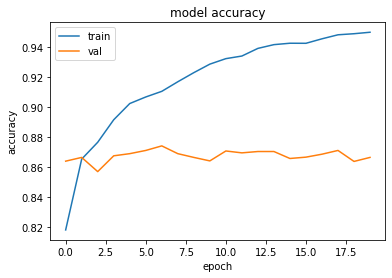

In [43]:
model = load_model(my_dir+'/weights_cnn_sentece.hdf5')

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


In [44]:
print("The model predicted {0:.2f}% correctly from the test dataset ".format(accuracy_score(Test_Y, (model.predict(Test_X) > 0.5).astype(int))*100))

The model predicted 92.29% correctly from the test dataset 


**You can write multiple sentences and see if the model thinks the review is positive or negative**

In [0]:
def CNN_class(my_text):
    test_sequences =  tokenizer.texts_to_sequences([my_text])
    data_padded_my_text = pad_sequences(test_sequences, maxlen=max_sequence_length)
    if model.predict(data_padded_my_text)>=0.5:
        print('The model predicted that the review is positive')
    else:
        print('The model predicted that the review is negative')

In [46]:
my_review = 'This computer is great! I love it!'
CNN_class(my_review)

The model predicted that the review is positive


In [47]:
my_review_2 = 'Very disappointed with the product, the quality is poor'
CNN_class(my_review_2)

The model predicted that the review is negative
